## Ablation study: Explore the impact of different token proportions on average model results

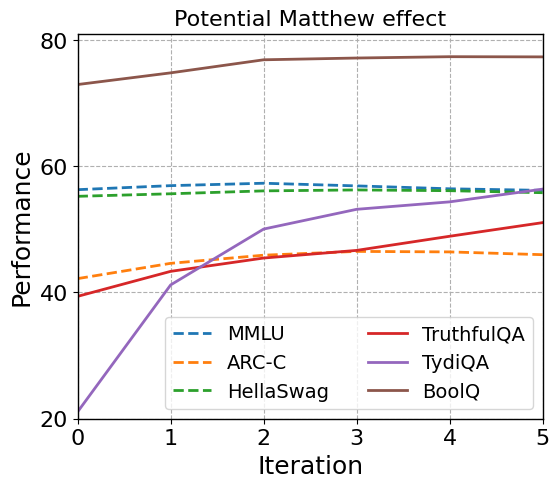

In [24]:
import matplotlib.pyplot as plt
import numpy as np
# 数据：每个样本的值（每列表示一个任务的得分）
# iter-split-0.3
# data = {
#     "mmlu": [56.99, 56.83, 55.61, 54.01, 53.03],
#     "bbh": [46.67, 44.91, 41.76, 36.02, 35.28],
#     "gsm8k": [28.0, 28.0, 24.5, 18.5, 12.5],
#     "hellaswag": [55.6, 56.01, 55.75, 54.65, 53.16],
    
#     "truthfulqa": [43.26, 47.05, 49.53, 51.08, 52.12],
#     "tydiqa": [38.8, 50.1, 50.6, 49.7, 48.2],
#     "arc_challenge": [44.53, 46.17, 46.43, 45.22, 44.1],
#     "openbookqa": [32.12, 32.32, 33.54, 33.54, 33.74],
#     "boolq": [74.18, 75.69, 76.9, 77.05, 77.36],
#     "average": [46.68, 48.56, 48.29, 46.64, 45.50],
# }


# data = {
#     # hold
#     # "mmlu": [56.29, 56.71, 57.19, 56.46, 55.37, 54.28],
#     # "hellaswag": [55.24, 55.69, 56.27, 56.54, 55.91, 54.89],
#     # "arc_challenge": [42.20, 44.70, 44.96, 45.65, 45.48, 44.96],
#     #decrease
#     "bbh": [45.37, 47.78, 46.57, 43.80, 41.67, 40.37],
#     "gsm8k": [23.00, 26.00, 30.00, 30.00, 27.00, 20.50],
    
#     ## increase
#     "truthfulqa": [39.39, 43.07, 46.40, 48.37, 50.04, 50.47],
#     "tydiqa": [21.10, 41.96, 49.27, 55.91, 57.03, 55.34],
#     "openbookqa": [30.71, 31.92, 32.73, 33.74, 34.34, 33.94],
#     "boolq": [72.95, 75.08, 76.81, 77.21, 77.15, 76.65],
#     # "average": [42.92, 47.00, 48.90, 49.70, 49.30, 47.90],
# }


###### iter split with fixed base model
# data = {
#     # hold
#     # "mmlu": [56.29, 56.71, 57.19, 56.46, 55.37, 54.28],
#     # "hellaswag": [55.24, 55.69, 56.27, 56.54, 55.91, 54.89],
#     # "arc_challenge": [42.20, 44.70, 44.96, 45.65, 45.48, 44.96],
#     #decrease
#     "bbh": [45.37, 47.78, 46.57, 43.80, 41.67, 40.37],
#     "gsm8k": [23.00, 26.00, 30.00, 30.00, 27.00, 20.50],
    
#     ## increase
#     "truthfulqa": [39.39, 43.07, 46.40, 48.37, 50.04, 50.47],
#     "tydiqa": [21.10, 41.96, 49.27, 55.91, 57.03, 55.34],
#     "openbookqa": [30.71, 31.92, 32.73, 33.74, 34.34, 33.94],
#     "boolq": [72.95, 75.08, 76.81, 77.21, 77.15, 76.65],
#     # "average": [42.92, 47.00, 48.90, 49.70, 49.30, 47.90],
# }

data = {
    # "Model": ["Base", "DS2 (10k, Warmup)", "model-1", "model-2", "model-3", "model-4"],
    "MMLU": [56.29, 56.93, 57.31, 56.89, 56.43, 56.18],
    "TruthfulQA": [39.39, 43.35, 45.46, 46.67, 48.91, 51.07],
    "TydiQA": [21.10, 41.20, 50.05, 53.18, 54.36, 56.38],
    # "LoqiQA": [22.17, 24.96, 27.44, 27.44, 28.22, 28.22],
    "HellaSwag": [55.24, 55.64, 56.10, 56.25, 56.13, 55.81],
    "ARC-C": [42.20, 44.62, 45.91, 46.51, 46.43, 45.99],
    "BoolQ": [72.95, 74.80, 76.87, 77.15, 77.36, 77.33],
}



# 设置 x 轴：每一行代表一个样本
x = [0, 1, 2, 3, 4, 5]

# 创建图形
plt.figure(figsize=(6, 5))

# 为每一列画一条曲线
for task, values in data.items():
    if task in ['MMLU', 'HellaSwag']:
        plt.plot(x, values, label=task, linewidth=2,  linestyle='-.')
    # elif task in ['bbh', 'gsm8k']:
    #     plt.plot(x, values, label=task, linewidth=2,  linestyle='--')
    else:
        plt.plot(x, values, label=task, linewidth=2,  linestyle='-')

# 添加标题和标签
plt.title("Potential Matthew effect", fontsize=16)
plt.xlabel("Iteration", fontsize=18)
plt.ylabel("Performance", fontsize=18)

# 显示图例
plt.legend(fontsize=14, loc='lower right', ncol=2)
plt.ylim(20, 81)  # 设置 y 轴的上下范围，调整为你需要的范围

# 设置 y 轴的刻度间隔为 20
plt.xticks(x, fontsize=16)
plt.xlim(0, 5)  # 设置 y 轴的上下范围，调整为你需要的范围
y_ticks = np.arange(20, 81, 20)  # 从 10 到 80，间隔为 20
plt.yticks(y_ticks, fontsize=16)  # 设置 y 轴刻度，并调整刻度数值的大小

ax = plt.gca()

# 设置边框颜色和粗细
for spine in ax.spines.values():
    spine.set_linewidth(1)  # 设置边框粗细
    spine.set_color('black')  # 这里可以修改颜色，例如 'darkgray', 'black'
    
# 显示图形
plt.grid(True, linestyle='--')
plt.show()

# disparate_impact_ssl

## The impact of token proportion 

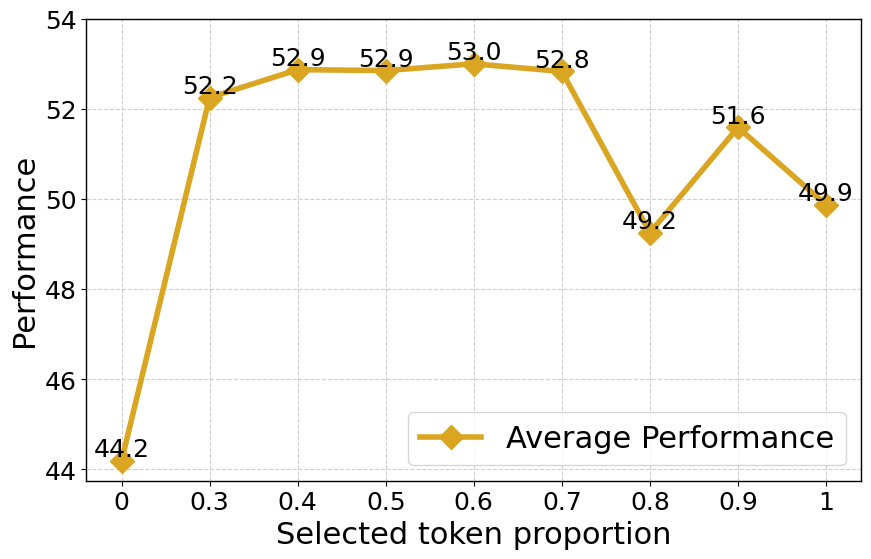

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the data
data = {
    "Model": [
        "0", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1"
    ],
    # "TruthfulQA": [39.39, 51.57, 50.69, 50.42, 51.07, 50.66, 48.40, 46.36, 43.32],
    # "TydiQA": [21.10, 52.96, 55.20, 55.19, 56.38, 55.47, 56.23, 51.68, 49.60],
    # "LoqiQA": [22.17, 26.51, 27.91, 28.37, 28.22, 27.91, 26.82, 26.98, 24.34],
    # "MMLU": [56.29, 55.42, 56.27, 56.25, 56.18, 56.10, 56.89, 57.25, 56.87],
    # "HellaSwag": [55.24, 55.55, 55.77, 55.83, 55.81, 55.93, 45.91, 56.34, 55.57],
    # "ARC-C": [42.20, 46.51, 46.86, 46.77, 45.99, 46.43, 33.33, 45.65,  44.44],
    # "BoolQ": [72.95, 77.24, 77.36, 77.12, 77.33, 77.36, 77.18, 76.90, 74.98],
    "AVG": [44.19, 52.25, 52.87, 52.85, 53.00, 52.83, 49.25, 51.59, 49.87]
}
# Convert to DataFrame
df = pd.DataFrame(data)

# Plot the curve
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:  # Skip the "Model" column
    plt.plot(df["Model"], df[column], marker='D', markersize=12, label="Average Performance", linewidth=4,  color='#DAA520') #B8860B

    # Annotate each point with its value
    for i, value in enumerate(df[column]):
        plt.text(df["Model"][i], value + 0.1, f"{value:.1f}", ha='center', fontsize=18, color='black')

# Customize the plot
plt.xlabel("Selected token proportion", fontsize=22)
plt.ylabel("Performance", fontsize=22)
# plt.title("Performance Comparison", fontsize=14)
plt.legend(fontsize=22, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

# Set y-axis tick marks
y_ticks = np.arange(44, 55, 2)  # Set tick range from 49 to 55 with step 1
plt.yticks(y_ticks, fontsize=18)
plt.xticks(fontsize=18)
# Customize axis appearance
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1)  # Set border thickness
    spine.set_color('black')  # Set border color

# Show the plot
plt.show()

# token_ratio_impact.png

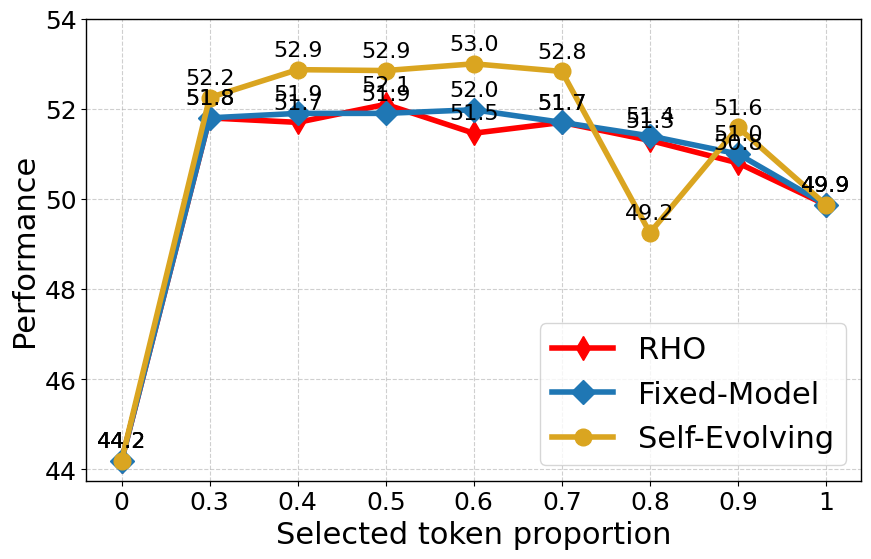

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 定义数据，增加一条新的曲线 "AVG2"
data = {
    "Model": ["0", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1"],
    "rho": [44.19, 51.80, 51.70, 52.10, 51.46, 51.70, 51.30, 50.80, 49.87],
    "fixed-model":  [44.19, 51.80, 51.90, 51.90, 51.98, 51.70, 51.40, 51.0, 49.87],  # 新增曲线
    "self-evolving":   [44.19, 52.25, 52.87, 52.85, 53.00, 52.83, 49.25, 51.59, 49.87],
}

# 转换为 DataFrame
df = pd.DataFrame(data)

# 创建图像
plt.figure(figsize=(10, 6))

# 定义两条曲线的颜色、标记和标签
colors = ['red', '#1f77b4', '#DAA520']  # 第一条用金色，第二条用蓝色
markers = ['d', 'D', 'o']
labels = ["RHO", "Fixed-Model", "Self-Evolving"]

# 遍历绘制两条曲线（跳过 "Model" 列）
for idx, column in enumerate(df.columns[1:]):
    plt.plot(df["Model"], df[column], marker=markers[idx], markersize=12, label=labels[idx],
             linewidth=4, color=colors[idx])
    
    # 为每个数据点添加数值标注
    for i, value in enumerate(df[column]):
        plt.text(df["Model"][i], value + 0.3, f"{value:.1f}", ha='center', fontsize=16, color='black')

# 图像美化
plt.xlabel("Selected token proportion", fontsize=22)
plt.ylabel("Performance", fontsize=22)
plt.legend(fontsize=22, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

# 设置 y 轴刻度
y_ticks = np.arange(44, 55, 2)
plt.yticks(y_ticks, fontsize=18)
plt.xticks(fontsize=18)

# 设置坐标轴边框样式
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1)
    spine.set_color('black')

# 显示图像
plt.show()
